### 1. 라이브러리 import

In [54]:
import pandas as pd # pandas는 데이터를 다루기 위한 라이브러리
from sklearn.model_selection import train_test_split  # train_test_split은 데이터를 train과 test로 나누기 위한 라이브러리
from sklearn.preprocessing import StandardScaler  # StandardScaler는 데이터를 표준화하기 위한 라이브러리
from sklearn.linear_model import LogisticRegression # LogisticRegression는 로지스틱 회귀를 위한 라이브러리
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier는 랜덤 포레스트를 위한 라이브러리
from xgboost import XGBClassifier # XGBClassifier는 XGBoost를 위한 라이브러리
from sklearn.metrics import classification_report, accuracy_score # classification_report와 accuracy_score를 import


### 2. data load and Split

In [55]:
from matplotlib import rcParams
rcParams['font.family'] = 'AppleGothic'

In [56]:
fw_df= pd.read_csv("player_TopRate_position_JJINMAK/FW_combined.csv")

In [57]:
fw_df

출전시간   평점  득점  도움  슈팅  유효슈팅  블락된 슈팅  벗어난 슈팅  PA내슈팅  PA외슈팅  ...  크로스성공  \
0       56  6.2   0   0   1     0       0       1      1      0  ...      0   
1       60  6.0   0   0   1     0       1       0      0      1  ...      0   
2       60  6.2   0   0   2     0       0       2      1      1  ...      0   
3       80  7.6   1   0   3     3       0       0      2      1  ...      0   
4       98  7.4   1   0   1     1       0       0      1      0  ...      1   
...    ...  ...  ..  ..  ..   ...     ...     ...    ...    ...  ...    ...   
1029    57  5.8   0   0   3     0       1       2      2      1  ...      0   
1030    95  8.0   2   0   5     3       1       1      4      1  ...      0   
1031    34  6.0   0   0   0     0       0       0      0      0  ...      0   
1032    98  7.0   0   0   2     0       0       2      2      0  ...      0   
1033    71  7.6   1   0   2     1       0       1      2      0  ...      0   

      크로스성공률(%)  탈압박  포지션_DF  포지션_FW  포지션_GK  포지션_MF  isWin  번호    선수  
0           0.0    0       0       1       0       0      0  18   오현규  
1           0.0    0       0       1       0       0      0   7   그로닝  
2           0.0    0       0       1       0       0      0  18   오현규  
3           0.0    0       0       1       0       0      1  18   이정협  
4          16.7    0       0       1       0       0      1  17   김대원  
...         ...  ...     ...     ...     ...     ...    ...  ..   ...  
1029        0.0    0       0       1       0       0      0  72   강성진  
1030        0.0    0       0       1       0       0      1   9   펠리페  
1031        0.0    0       0       1       0       0      0  21   이기혁  
1032        0.0    0       0       1       0       0      1  10  일류첸코  
1033        0.0    0       0       1       0       0      1  22   권창훈  

[1034 rows x 64 columns]

### 3. VIF 계산

In [66]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(dataframe):
    """
    주어진 데이터프레임의 VIF(분산 팽창 계수)를 계산.

    Args:
        dataframe (pd.DataFrame): 독립 변수들로 이루어진 데이터프레임.

    Returns:
        pd.DataFrame: 변수 이름과 해당 VIF 값.
    """
    # 상수항 추가 (회귀식의 절편을 고려하기 위함)
    X = add_constant(dataframe)
    
    # VIF 계산
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif_data

fw_df_drop = fw_df.copy()
fw_df_drop = fw_df_drop.drop(columns= ['선수', "포지션_DF", "포지션_FW", "포지션_GK", "포지션_MF", "평점", "isWin"])
# 예시 데이터
# df: 독립 변수들로 이루어진 데이터프레임
vif_result = calculate_vif(fw_df_drop)
vif_result = vif_result[vif_result['VIF'] < 7].reset_index(drop=True)
# VIF 결과 출력
# 내림차순 정렬
sorted_vif_result = sorted(vif_result, key=lambda x: x[1], reverse=True)

# 결과 출력
print(vif_result)
feature_list = vif_result['Feature'].tolist()


/Users/5jun99/.pyenv/versions/3.8.19/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


         Feature       VIF
0           출전시간  3.479016
1             득점  2.247487
2             도움  1.308563
3          오프사이드  1.117201
4            프리킥  2.608257
5            코너킥  2.681229
6            스로인  1.206724
7         드리블 성공  3.240193
8     드리블 성공률(%)  3.076694
9         Ishome  1.096241
10      경합(지상)성공  2.224394
11  경합(지상)성공률(%)  1.531963
12      경합(공중)성공  2.344429
13  경합(공중)성공률(%)  1.515905
14          태클성공  3.432193
15      태클성공률(%)  3.118241
16          클리어링  1.269966
17          인터셉트  1.304415
18            차단  1.428530
19            획득  1.813691
20            블락  1.269479
21           볼미스  1.091940
22            파울  1.297442
23           피파울  1.252873
24            경고  1.159951
25            퇴장  1.033197
26      패스성공률(%)  6.249400
27           키패스  1.961214
28      공격진영패스성공  4.548347
29  공격진영패스성공률(%)  1.817614
30      수비진영패스성공  2.544562
31  수비진영패스성공률(%)  1.938581
32     롱패스성공률(%)  2.290950
33   중거리패스성공률(%)  2.217582
34     숏패스성공률(%)  4.854925
35    전진패스성공률(%)  2.106301
3

/Users/5jun99/.pyenv/versions/3.8.19/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [59]:
vif_result_sorted = vif_result.sort_values(by=vif_result.columns[1], ascending=False)

# 결과 확인
vif_result_sorted

Feature       VIF
26      패스성공률(%)  6.249400
38         크로스성공  5.136202
34     숏패스성공률(%)  4.854925
28      공격진영패스성공  4.548347
0           출전시간  3.479016
14          태클성공  3.432193
7         드리블 성공  3.240193
15      태클성공률(%)  3.118241
8     드리블 성공률(%)  3.076694
39     크로스성공률(%)  2.694291
5            코너킥  2.681229
4            프리킥  2.608257
30      수비진영패스성공  2.544562
12      경합(공중)성공  2.344429
32     롱패스성공률(%)  2.290950
1             득점  2.247487
10      경합(지상)성공  2.224394
33   중거리패스성공률(%)  2.217582
36     횡패스성공률(%)  2.117839
35    전진패스성공률(%)  2.106301
27           키패스  1.961214
31  수비진영패스성공률(%)  1.938581
29  공격진영패스성공률(%)  1.817614
19            획득  1.813691
37     백패스성공률(%)  1.618875
11  경합(지상)성공률(%)  1.531963
13  경합(공중)성공률(%)  1.515905
18            차단  1.428530
2             도움  1.308563
17          인터셉트  1.304415
22            파울  1.297442
16          클리어링  1.269966
20            블락  1.269479
23           피파울  1.252873
41            번호  1.251244
6            스로인  1.206724
24            경고  1.159951
40           탈압박  1.130998
3          오프사이드  1.117201
9         Ishome  1.096241
21           볼미스  1.091940
25            퇴장  1.033197

/var/folders/kg/sxknqstx26nfn5b2xymgy71r0000gn/T/ipykernel_1439/777502043.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Feature', data=vif_result_sorted, palette='viridis')


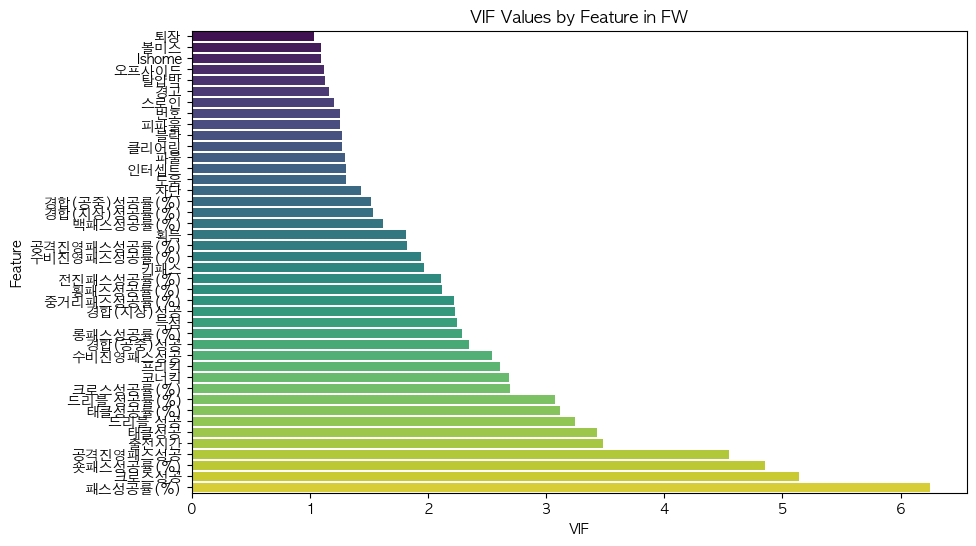

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# VIF 값을 오름차순으로 정렬
vif_result_sorted = vif_result.sort_values(by='VIF', ascending=True)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Feature', data=vif_result_sorted, palette='viridis')
plt.title('VIF Values by Feature in FW')
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.show()

In [71]:
# '성공'이 포함되었지만 '성공률'이 없는 항목을 제외한 리스트 만들기
filtered_features = [
    feature for feature in feature_list 
    if ('성공' in feature and '성공률' in feature) or '성공률' not in feature
]

print(len(filtered_features))

42


In [39]:
X = fw_df[filtered_features]
y = fw_df["isWin"]  # 타겟 변수

# 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 4. LogisticRegression learning and evalutaion (RFE)
- RFE(Recursive Feature Elimination)

In [ ]:
from sklearn.feature_selection import RFE
# 모델 선택
model = LogisticRegression(max_iter=10000)

# RFE를 통한 피처 선택
selector = RFE(estimator=model, n_features_to_select=10)  # 선택할 피처 수 설정
selector = selector.fit(X_train, y_train)

# 선택된 피처 출력
selected_features = X_train.columns[selector.support_]  # 선택된 피처들
print("선택된 피처들:", selected_features)

# 선택된 피처를 사용한 모델 학습
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# 모델 학습
model.fit(X_train_selected, y_train)

# 모델 성능 평가
accuracy = model.score(X_test_selected, y_test)
print(f"모델 정확도: {accuracy:.4f}")

### 5. LogisticRegression learning and evalutaion 

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
logistic_model = LogisticRegression(random_state=42)

In [42]:
logistic_model.fit(X_train_scaled, y_train)
logistic_preds = logistic_model.predict(X_test_scaled)

In [43]:
print("Logistic Regression Performance:")
print(classification_report(y_test, logistic_preds))
print("Accuracy:", accuracy_score(y_test, logistic_preds))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       109
           1       0.78      0.83      0.80        98
           2       0.23      0.07      0.11        41

    accuracy                           0.73       248
   macro avg       0.58      0.60      0.57       248
weighted avg       0.67      0.73      0.69       248

Accuracy: 0.7298387096774194


### 6. RandomForest and evalutaion 

In [44]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

In [45]:
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [46]:
print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       109
           1       0.73      0.90      0.80        98
           2       0.00      0.00      0.00        41

    accuracy                           0.75       248
   macro avg       0.50      0.60      0.54       248
weighted avg       0.63      0.75      0.68       248

Accuracy: 0.7459677419354839


### 7. XGBoost and evalutaion 

In [47]:
xgb_model = XGBClassifier(random_state=42, n_estimators=100, max_depth=10, learning_rate=0.1)

In [48]:
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [49]:
print("\nXGBoost Performance:")
print(classification_report(y_test, xgb_preds))
print("Accuracy:", accuracy_score(y_test, xgb_preds))


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       109
           1       0.75      0.85      0.80        98
           2       0.40      0.15      0.21        41

    accuracy                           0.74       248
   macro avg       0.64      0.62      0.61       248
weighted avg       0.70      0.74      0.71       248

Accuracy: 0.7419354838709677


### 8. Logistic, Random, XGBoost overfit check

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# 모델 초기화
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10),
    "XGBoost": XGBClassifier(random_state=42, n_estimators=100, max_depth=10, learning_rate=0.1),
}

# 성능 평가 함수 정의
def evaluate_model(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tn + fp + fn + tp)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return accuracy, precision, recall, f1

# 모델 학습 및 평가
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # 학습
    model.fit(X_train, y_train)
    
    # 학습 데이터 성능
    train_preds = model.predict(X_train)
    train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, train_preds)
    
    # 테스트 데이터 성능
    test_preds = model.predict(X_test)
    test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, test_preds)
    
    # 성능 비교 출력
    print(f"{model_name} Performance:")
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(f"Train Precision: {train_precision:.4f}, Test Precision: {test_precision:.4f}")
    print(f"Train Recall: {train_recall:.4f}, Test Recall: {test_recall:.4f}")
    print(f"Train F1 Score: {train_f1:.4f}, Test F1 Score: {test_f1:.4f}")
    
    # 과적합 여부 확인
    if train_accuracy - test_accuracy > 0.1 or train_f1 - test_f1 > 0.1:
        print("Potential Overfitting Detected!")
    else:
        print("No Significant Overfitting Observed.")

### 9. Visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# 모델 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

# 교차 검증과 혼돈 행렬 시각화
for model_name, model in models.items():
    print(f"모델: {model_name}")
    
    # 교차 검증: 5-fold 교차 검증으로 정확도 평가
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"교차 검증 정확도: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 테스트 데이터로 예측
    y_pred = model.predict(X_test)
    
    # 혼돈 행렬 계산
    cm = confusion_matrix(y_test, y_pred)
    
    # 혼돈 행렬 시각화
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    
    print("="*50)

# 10. XAI

Logistic Regression SHAP Summary Plot


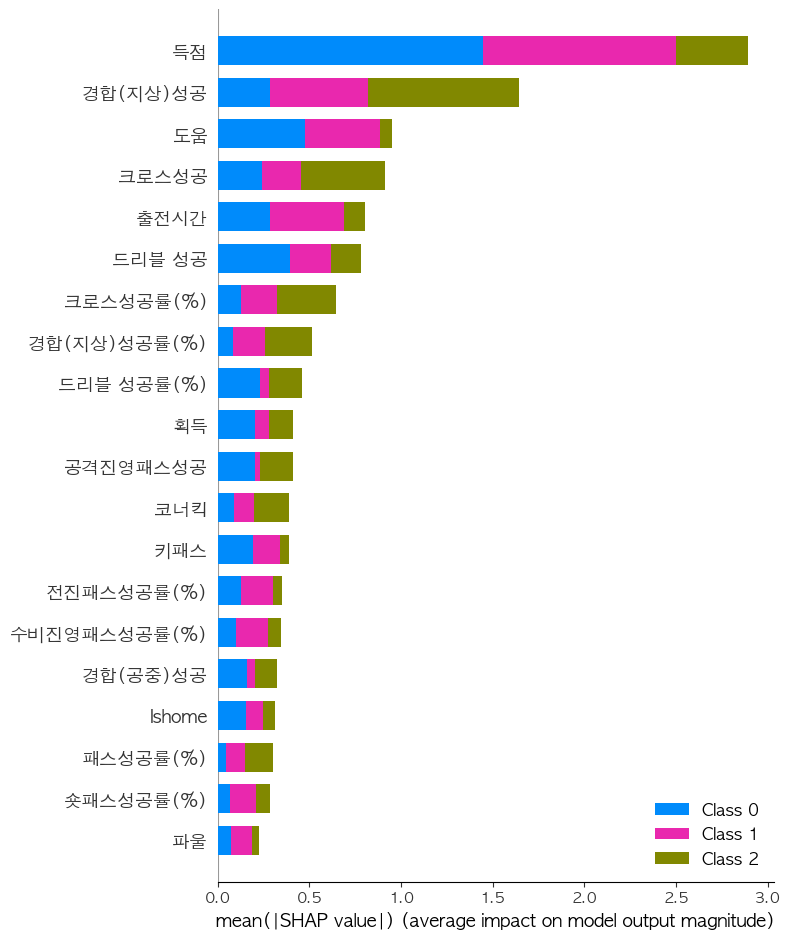

Random Forest SHAP Summary Plot


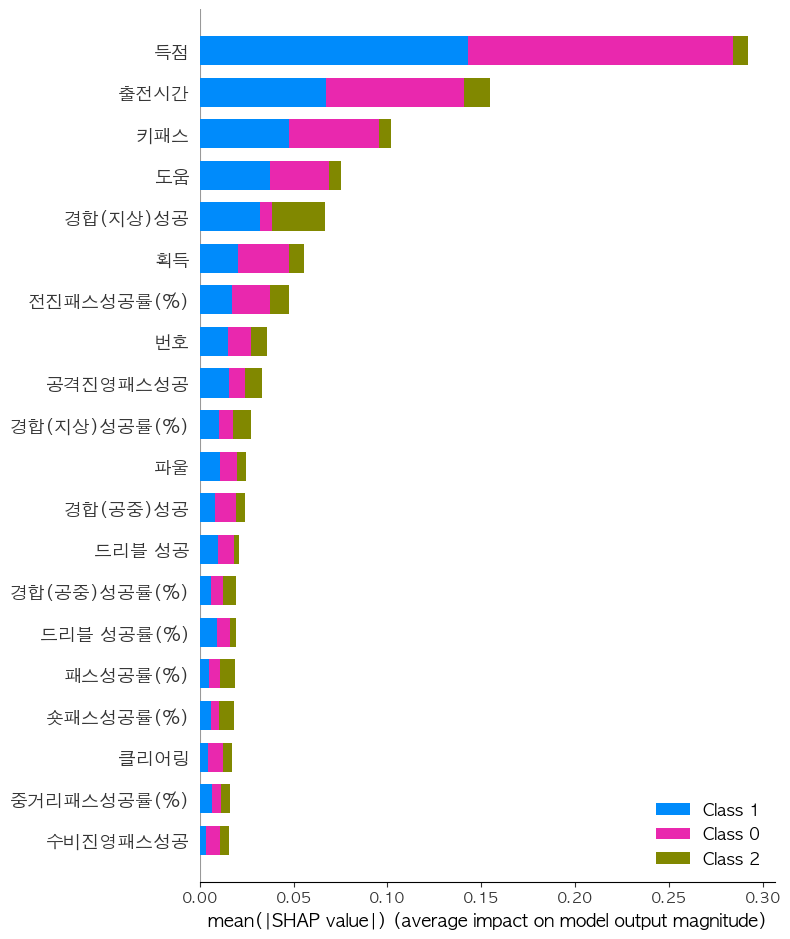

[17:48:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost SHAP Summary Plot


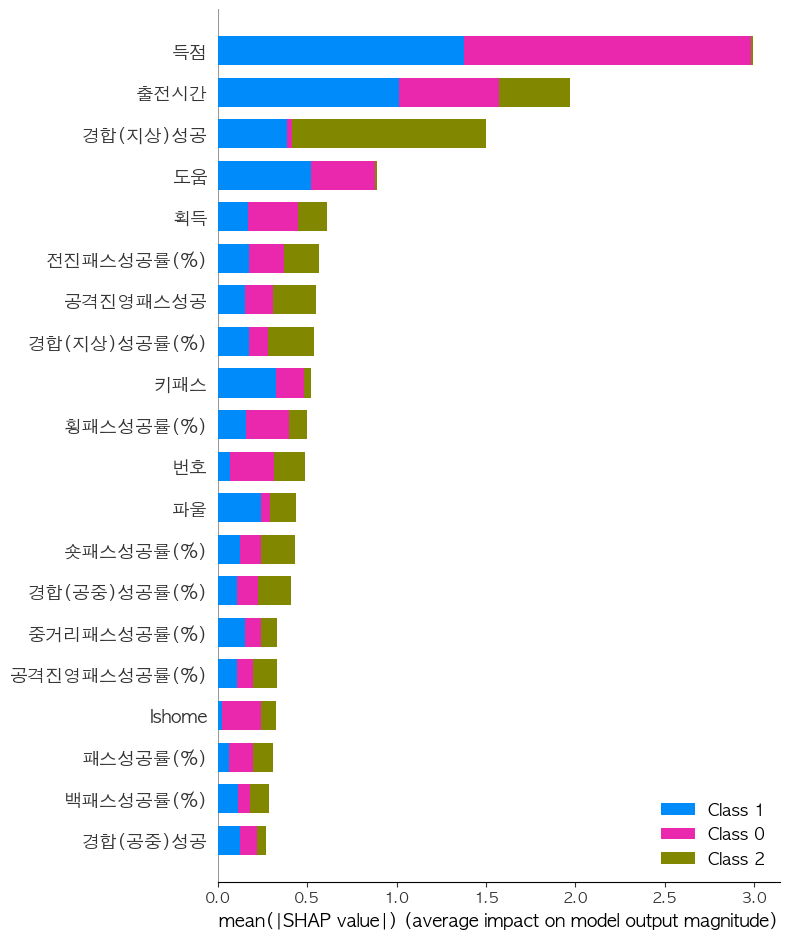

In [76]:
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# 데이터 준비
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# SHAP 값 계산 및 시각화
for model_name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train)
    
    # SHAP 설명기 생성
    explainer = shap.TreeExplainer(model) if model_name == "XGBoost" or model_name == "Random Forest" else shap.LinearExplainer(model, X_train)
    
    # SHAP 값 계산
    shap_values = explainer.shap_values(X_test)
    
    # SHAP summary plot
    print(f"{model_name} SHAP Summary Plot")
    shap.summary_plot(shap_values, X_test)
    plt.show()
    
    # SHAP dependence plot (특정 특성에 대한 SHAP 값의 관계 시각화)
    # shap.dependence_plot(0, shap_values, X_test)  # 0번 특성 (첫 번째 특성)에 대한 종속성 플롯
    # plt.show()

In [53]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# 모델 학습 (예시: 랜덤 포레스트)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# LIME 설명기 생성
explainer = LimeTabularExplainer(X_train.values, training_labels=y_train.values, mode='classification', 
                                 feature_names=X.columns, class_names=['0', '1'], discretize_continuous=True)

# 특정 샘플에 대해 설명 생성
i = 1  # 설명을 원하는 샘플 인덱스
explanation = explainer.explain_instance(X_test.iloc[i].values, model.predict_proba)

# LIME 결과 시각화
explanation.show_in_notebook(show_table=True, show_all=False)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


# XAI

Logistic Regression SHAP Summary Plot


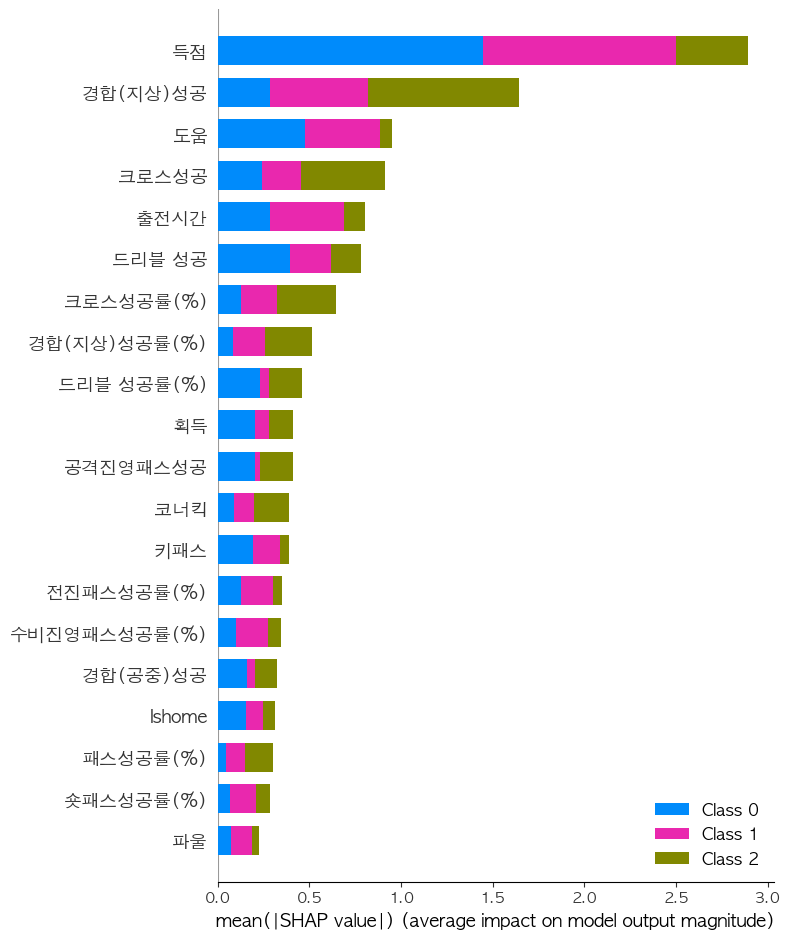

Random Forest SHAP Summary Plot


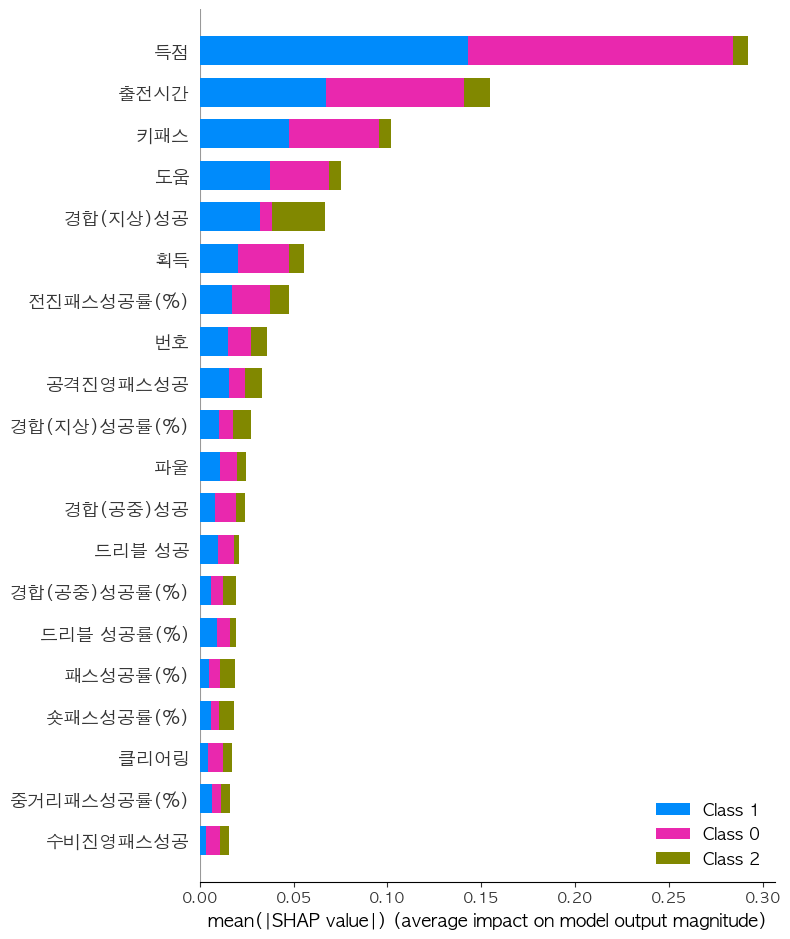

[17:48:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost SHAP Summary Plot


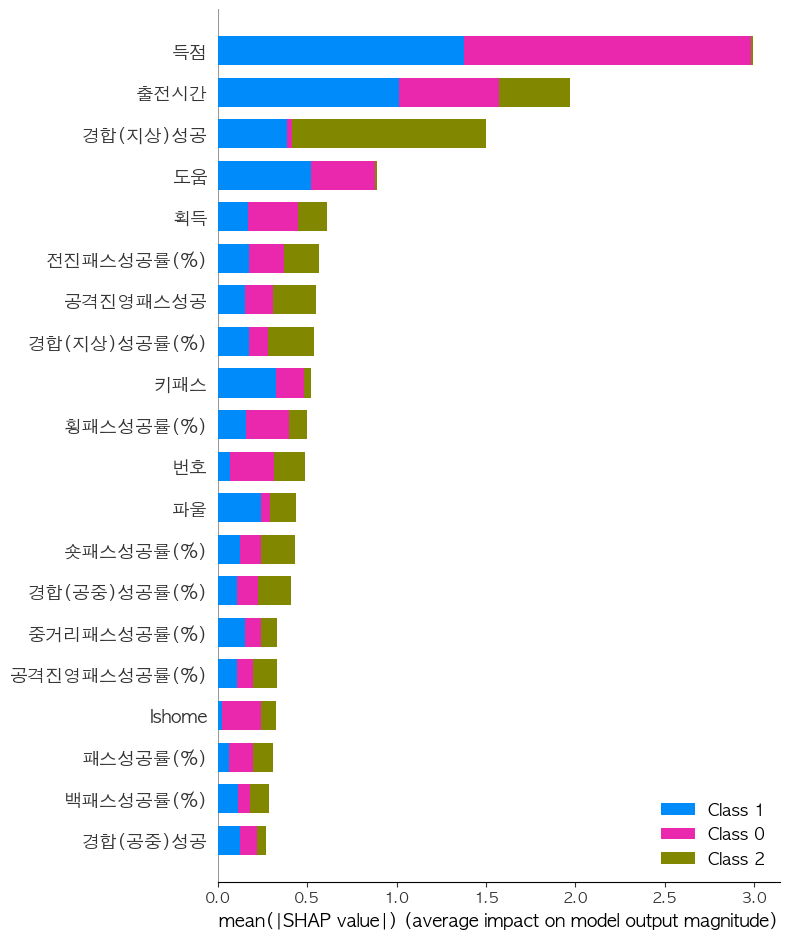

In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# 데이터 준비
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# SHAP 값 계산 및 시각화
for model_name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train)
    
    # SHAP 설명기 생성
    explainer = shap.TreeExplainer(model) if model_name == "XGBoost" or model_name == "Random Forest" else shap.LinearExplainer(model, X_train)
    
    # SHAP 값 계산
    shap_values = explainer.shap_values(X_test)
    
    # SHAP summary plot
    print(f"{model_name} SHAP Summary Plot")
    shap.summary_plot(shap_values, X_test)
    plt.show()
    
    # SHAP dependence plot (특정 특성에 대한 SHAP 값의 관계 시각화)
    # shap.dependence_plot(0, shap_values, X_test)  # 0번 특성 (첫 번째 특성)에 대한 종속성 플롯
    # plt.show()

In [ ]:
!pip install lime

  Preparing metadata (setup.py) ... done
  Using cached networkx-3.1-py3-none-any.whl.metadata (5.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.5 MB/s eta 0:00:00 0:00:01
Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 21.0 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283840 sha256=6f6352979355895ef21964256bdbb34b9e455e012d8a1368f304ebf9defae40a
  Stored in directory: /Users/5jun99/Library/Caches/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# 모델 학습 (예시: 랜덤 포레스트)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# LIME 설명기 생성
explainer = LimeTabularExplainer(X_train.values, training_labels=y_train.values, mode='classification', 
                                 feature_names=X.columns, class_names=['0', '1'], discretize_continuous=True)

# 특정 샘플에 대해 설명 생성
i = 1  # 설명을 원하는 샘플 인덱스
explanation = explainer.explain_instance(X_test.iloc[i].values, model.predict_proba)

# LIME 결과 시각화
explanation.show_in_notebook(show_table=True, show_all=False)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
